# **Dependancies**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/btc_data')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import *
from keras.callbacks import *
import os
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from commons import mean_absolute_percentage_error
from keras.layers import *
from sklearn.pipeline import Pipeline

# **Loading Data**

In [4]:
import pandas as pd

# Đường dẫn đến file btc_data.csv
file_path = '/content/drive/My Drive/Colab Notebooks/btc_data/BTC_Data_2014-2022.csv'

# Đọc file CSV
data = pd.read_csv(file_path)





# Hiển thị 5 dòng đầu tiên
print(data.head(50))


          Date  priceUSD      size  sentbyaddress  transactions  \
0   2014/04/09   447.110  243742.0         122401         64992   
1   2014/04/10   407.703  254334.0         124298         67872   
2   2014/04/11   403.328  223656.0         117926         65563   
3   2014/04/12   425.310  169964.0          87828         47579   
4   2014/04/13   415.876  162260.0          94828         50981   
5   2014/04/14   445.898  216048.0         127969         70026   
6   2014/04/15   487.666  241539.0         123107         72627   
7   2014/04/16   517.354  270984.0         114312         68435   
8   2014/04/17   505.461  223631.0         102596         65021   
9   2014/04/18   485.296  205478.0         100633         56836   
10  2014/04/19   490.961  193237.0          93159         53356   
11  2014/04/20   501.271  169511.0          88713         48865   
12  2014/04/21   498.970  190616.0          93895         57939   
13  2014/04/22   491.704  288040.0         125522         7788

In [ ]:
# Chỉ sử dụng dữ liệu sau 90 ngày
data = data.iloc[89:]  # Bỏ đi các hàng đầu tiên có NaN


In [ ]:
data.head(100)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,...,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,MA_30,MA_60,MA_90
89,2014/07/07,626.639,254198.0,117302,64536,19.359,259716987.0,0.1090,0.0627,9.600,...,4643.0,93.704,22248,8.615,0.299,186344,19.325,610.295667,571.864983,533.517711
90,2014/07/08,621.123,285312.0,136433,69967,18.424,200330013.0,0.1090,0.0621,9.600,...,3248.0,87.178,24425,8.016,0.327,214423,19.308,609.236967,574.819183,535.451189
91,2014/07/09,621.434,256506.0,122923,68352,19.194,251215935.0,0.1060,0.0621,8.675,...,4173.0,89.888,24542,7.314,0.282,184913,19.289,608.344933,577.683650,537.825978
92,2014/07/10,616.557,253741.0,119374,64456,17.967,278516190.0,0.1070,0.0617,9.664,...,4869.0,109.857,23242,8.067,0.300,171317,19.286,607.204600,580.583850,540.195189
93,2014/07/11,622.121,233392.0,115912,58921,18.387,228203200.0,0.1150,0.0622,9.231,...,4395.0,129.459,20939,7.746,0.279,170691,19.281,606.525167,583.650383,542.381978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2014/10/10,362.280,285337.0,146931,80903,5.194,272361697.0,0.0582,0.0362,9.290,...,4433.0,105.543,19090,8.064,0.335,170684,20.117,402.094133,450.233217,500.172489
185,2014/10/11,359.388,248806.0,119838,64876,4.774,176827658.0,0.0575,0.0359,10.000,...,3177.0,88.901,17107,7.717,0.288,146972,20.205,398.221067,446.752083,497.169422
186,2014/10/12,362.544,286125.0,141427,63361,5.362,136730550.0,0.0630,0.0363,9.730,...,2685.0,74.164,17072,7.268,0.298,220350,20.232,394.561800,443.610183,494.288800
187,2014/10/13,378.689,296306.0,153138,77787,5.629,241925769.0,0.0638,0.0379,9.290,...,3771.0,97.407,22018,8.030,0.338,182882,20.139,391.336733,441.271833,491.595778


# **Model Architecture + Training**

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best model saved at: /content/drive/My Drive/Colab Notebooks/btc_data/srm/best_model_sarimax.pkl
Evaluation Metrics:
MAE: 466.30
RMSE: 545.32
R^2: 1.00
    Actual     Predicted
0  42336.0  42320.838899
1  42232.0  42244.407170
2  43867.0  43936.704156
3  43998.0  44057.933751
4  42666.0  42675.739478
5  40411.0  40369.576345
6  40065.0  40003.106188
7  38767.0  38676.449846
8  38507.0  38409.903391
9  37400.0  37269.693477
Predictions saved to: /content/drive/My Drive/Colab Notebooks/btc_data/srm/result_predictions.csv


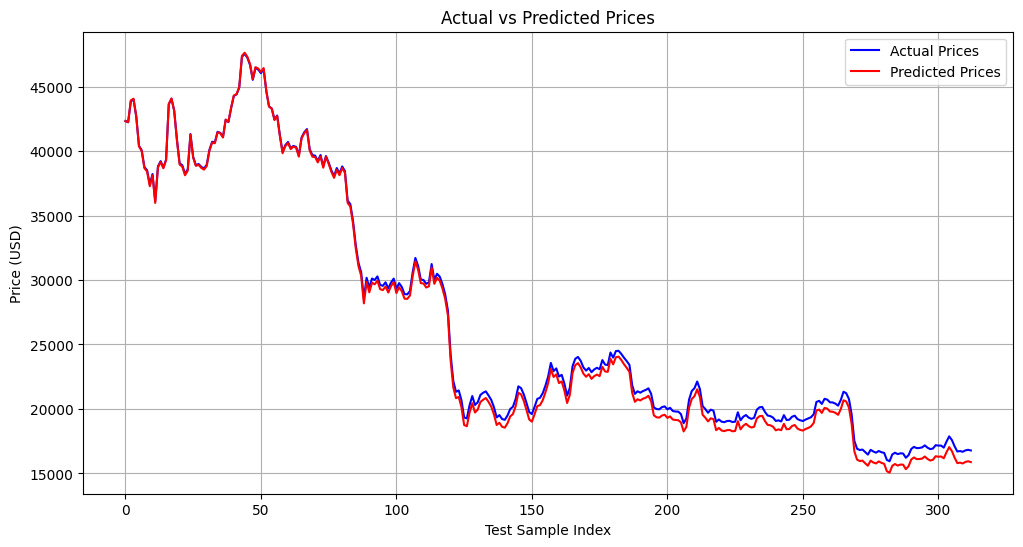

In [8]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Tính toán các đặc trưng cần thiết
#data['MA_30'] = data['priceUSD'].rolling(window=30).mean()

# Chỉ sử dụng dữ liệu sau 90 ngày
#data = data.iloc[29:]

# Chọn cột đặc trưng và mục tiêu
X = data.drop(columns=['priceUSD', 'Date'])
y = data['priceUSD']

# Chia dữ liệu theo thời gian, 90% đầu tiên cho tập huấn luyện, 10% cuối cho tập kiểm tra
split_index = int(len(X) * 0.9)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Xây dựng mô hình SARIMAX
sarimax_model = SARIMAX(y_train_scaled, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# Lưu mô hình tốt nhất
save_dir = '/content/drive/My Drive/Colab Notebooks/btc_data/srm'
os.makedirs(save_dir, exist_ok=True)

best_model_path = os.path.join(save_dir, 'best_model_sarimax.pkl')
with open(best_model_path, 'wb') as f:
    pickle.dump(sarimax_result, f)

print(f"Best model saved at: {best_model_path}")

# Dự đoán
y_pred_scaled = sarimax_result.predict(start=len(y_train_scaled), end=len(y_train_scaled) + len(y_test_scaled) - 1, exog=X_test)

# Chuyển ngược scale dữ liệu dự đoán và thực tế

# Chuyển ngược scale dữ liệu dự đoán và thực tế
y_pred_original = scaler.inverse_transform(np.array(y_pred_scaled).reshape(-1, 1))  # Chuyển Series thành array
y_test_original = scaler.inverse_transform(y_test_scaled)


# Đánh giá mô hình
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# Hiển thị kết quả dự đoán và thực tế
results = pd.DataFrame({
    'Actual': y_test_original.flatten(),
    'Predicted': y_pred_original.flatten()
})
print(results.head(10))

# Lưu kết quả vào file CSV
results_path = os.path.join(save_dir, 'result_predictions.csv')
results.to_csv(results_path, index=False)
print(f"Predictions saved to: {results_path}")

# Đồ thị dự đoán và thực tế
plt.figure(figsize=(12, 6))
plt.plot(y_test_original.flatten(), label='Actual Prices', color='blue')
plt.plot(y_pred_original.flatten(), label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


SARIMAX model loaded successfully.


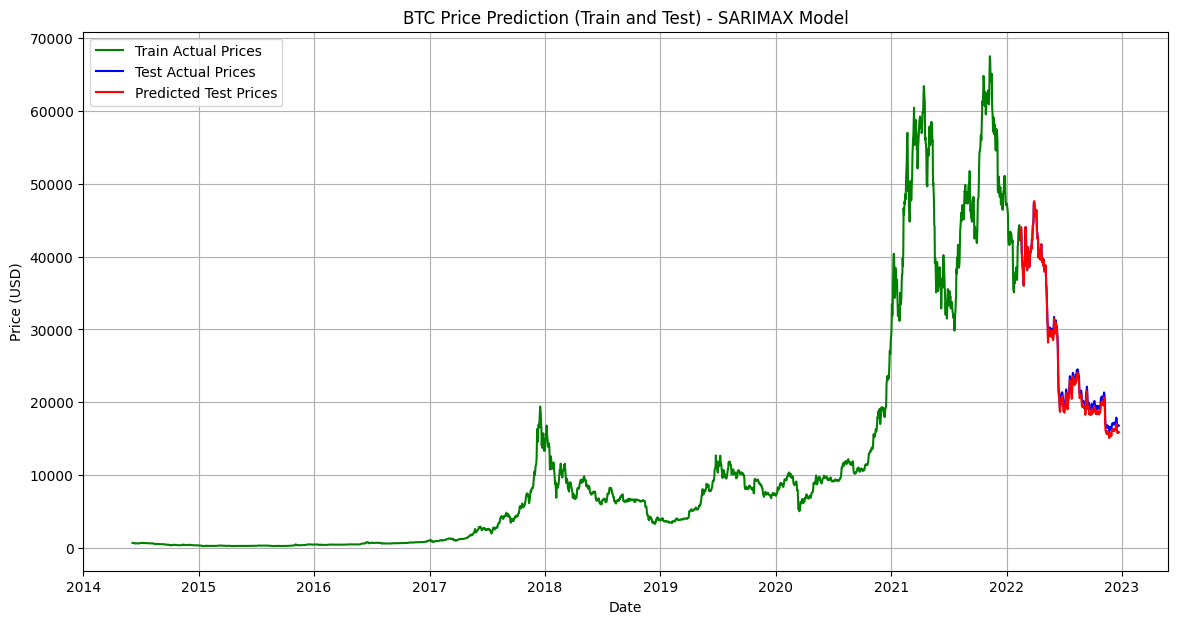

Predictions saved to: /content/drive/My Drive/Colab Notebooks/btc_data/srm/result_train_predictions_test.csv


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler

# Đường dẫn tới mô hình đã lưu
model_path = '/content/drive/My Drive/Colab Notebooks/btc_data/srm/best_model_sarimax.pkl'

# Tải mô hình SARIMAX đã lưu
with open(model_path, 'rb') as f:
    sarimax_model = pickle.load(f)
print("SARIMAX model loaded successfully.")

# Dự đoán trên tập test
y_pred_scaled = sarimax_model.predict(start=len(y_train_scaled), end=len(y_train_scaled) + len(y_test_scaled) - 1, exog=X_test)

# Chuyển ngược scale dữ liệu dự đoán và thực tế
y_pred_original = scaler.inverse_transform(np.array(y_pred_scaled).reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
y_train_original = scaler.inverse_transform(y_train_scaled.reshape(-1, 1))

# Đảm bảo cột 'Date' là kiểu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Đồ thị toàn bộ dữ liệu
plt.figure(figsize=(14, 7))

# Plot dữ liệu train
plt.plot(data.iloc[:split_index]['Date'], y_train_original.flatten(), label='Train Actual Prices', color='green')

# Plot dữ liệu test
plt.plot(data.iloc[split_index:]['Date'], y_test_original.flatten(), label='Test Actual Prices', color='blue')

# Plot dự đoán tập test
plt.plot(data.iloc[split_index:]['Date'], y_pred_original.flatten(), label='Predicted Test Prices', color='red')

# Thông tin đồ thị
plt.title('BTC Price Prediction (Train and Test) - SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Tạo DataFrame kết quả
results = pd.DataFrame({
    'Date': data.iloc[split_index:]['Date'],
    'Actual_Test': y_test_original.flatten(),
    'Predicted_Test': y_pred_original.flatten()
})

# Lưu vào file CSV
results_path = '/content/drive/My Drive/Colab Notebooks/btc_data/srm/result_train_predictions_test.csv'
results.to_csv(results_path, index=False)
print(f"Predictions saved to: {results_path}")


SARIMAX model loaded successfully.


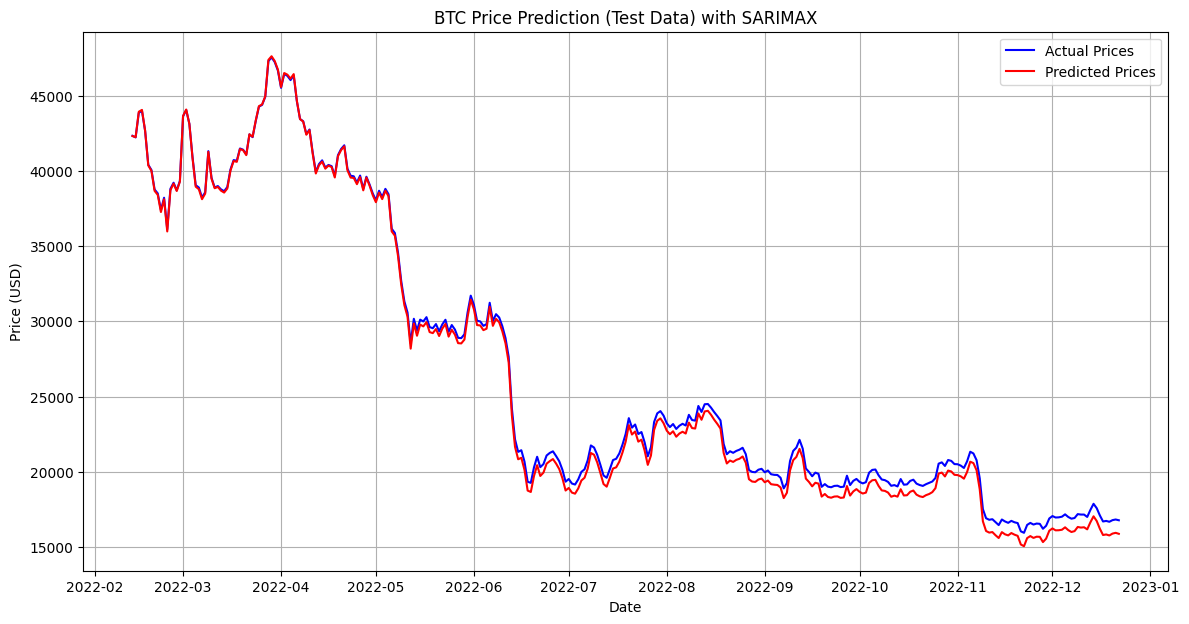

Predictions saved to: /content/drive/My Drive/Colab Notebooks/btc_data/srm/result_predictions_sarimax_test.csv
Evaluation Metrics:
MAE: 466.30
RMSE: 545.32
R^2: 1.00
MSE: 297374.26
MAPE: 2.30%


In [10]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Đường dẫn tới mô hình đã lưu
best_model_path = '/content/drive/My Drive/Colab Notebooks/btc_data/srm/best_model_sarimax.pkl'

# Tải mô hình đã lưu
with open(best_model_path, 'rb') as f:
    sarimax_result = pickle.load(f)

print("SARIMAX model loaded successfully.")

# Dự đoán
y_pred_scaled = sarimax_result.predict(start=len(y_train_scaled), end=len(y_train_scaled) + len(y_test_scaled) - 1, exog=X_test)

# Chuyển ngược scale dữ liệu dự đoán và thực tế
y_pred_original = scaler.inverse_transform(np.array(y_pred_scaled).reshape(-1, 1))  # Chuyển Series thành array
y_test_original = scaler.inverse_transform(y_test_scaled)

# Đảm bảo cột 'Date' là kiểu datetime (nếu chưa)
data['Date'] = pd.to_datetime(data['Date'])

# Đồ thị dự đoán và thực tế
plt.figure(figsize=(14, 7))

# Vẽ dữ liệu thực tế
plt.plot(data.iloc[split_index:]['Date'], y_test_original.flatten(), label='Actual Prices', color='blue')

# Vẽ dữ liệu dự đoán
plt.plot(data.iloc[split_index:]['Date'], y_pred_original.flatten(), label='Predicted Prices', color='red')

# Thông tin đồ thị
plt.title('BTC Price Prediction (Test Data) with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Tạo DataFrame kết quả
results = pd.DataFrame({
    'Date': data.iloc[split_index:]['Date'],
    'Actual_Price': y_test_original.flatten(),
    'Predicted_Price': y_pred_original.flatten()
})

# Lưu kết quả vào file CSV
results_path = '/content/drive/My Drive/Colab Notebooks/btc_data/srm/result_predictions_sarimax_test.csv'
results.to_csv(results_path, index=False)
print(f"Predictions saved to: {results_path}")

# Tính toán các thông số đánh giá
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

# Tính toán MAPE
mape = np.mean(np.abs((y_test_original.flatten() - y_pred_original.flatten()) / y_test_original.flatten())) * 100

# In các chỉ số
print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")


# **Testing Model**